# Meander wavelength/Discharge Analysis 

#### Import packages 

In [1]:
import data_methods as dm 
import os
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import math 
from geopy import distance 

## Get all data 

Acquire all segmented data (handpicked by Char/Brynn), and the Leopold/Wolman data (transcribed by Sam)

#### Paths

In [2]:
segment_folder = r'C:\Users\bydd1\OneDrive\Documents\Research\MS Sinuosity Data\Segments'
comparison_path = r'C:\Users\bydd1\OneDrive\Documents\Research\MS Sinuosity Data\Data from Sam\LeopoldWolmanApp8_noflume.xlsx'
compressed_discharge_path = r'C:\Users\bydd1\OneDrive\Documents\Research\MS Sinuosity Data\compressed_ra.pickle'  

#### read segment excel spreadsheets, assign discharges from compressed_ra.pickle

In [3]:
segments = os.listdir(segment_folder)
comp_x = pd.read_excel(comparison_path)

seg_data_wave = []
seg_data_dis = []
stds = []

for seg in segments: #iterate through all files in 'Segments' folder 
    if seg != 'data_descriptions.txt':
        if seg[0] != '~': #weird excel coding for autosave version of file 
            print(seg)
            path = os.path.join(segment_folder, seg)
            seg_x = pd.read_excel(path)
            
            #use nearest neighbors method to assign values fom compressed_ra.pickle to segment in question 
            dm.assign_cop_to_latlon(path, compressed_discharge_path)
            seg_x = pd.read_excel(path) #read the file just written 
            print('')
            #get meander wavelength and discharge data 
            seg_data_wave.append(seg_x['Meandwave'].tolist())
            seg_data_dis.append(seg_x['max_dis'].tolist())

Seg1.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.8108716011047363 seconds ---

Seg10.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.5051801204681396 seconds ---

Seg11.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.6006364822387695 seconds ---

Seg12.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.6069602966308594 seconds ---

Seg13.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.4716219902038574 seconds ---

Seg14.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.8947479724884033 seconds ---

Seg15.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.665942907333374 seconds ---

Seg16.xlsx
entry 0
writing new columns to dataframe...
rewriting

C:\Users\bydd1\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


rewriting excel file with 9 new columns...
--- 0.9635310173034668 seconds ---

Seg3.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.5456109046936035 seconds ---

Seg4.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.552351713180542 seconds ---

Seg5.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.6508951187133789 seconds ---

Seg6.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.5355813503265381 seconds ---

Seg7.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.8178150653839111 seconds ---

Seg8.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.5198771953582764 seconds ---

Seg9.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.49680352210998535 sec

#### read Leopold/Wolman data

In [4]:
#read leopold/wolman data transcribed by Sam 
leopold_x = pd.read_excel(comparison_path)
leopold_wave = leopold_x['Wavelength (m)'].tolist()
leopold_dis = leopold_x['Qbankfull (cms)'].tolist()

## Visualize
### Fig1: Acquired data vs. L/W
1. Plot all data generated in last step (meader wavelength vs. discharge on a log scale) 
2. Plot all Leopold/Wolman data

Text(0.5, 1.0, 'Fig1: Acquired data vs. L/W')

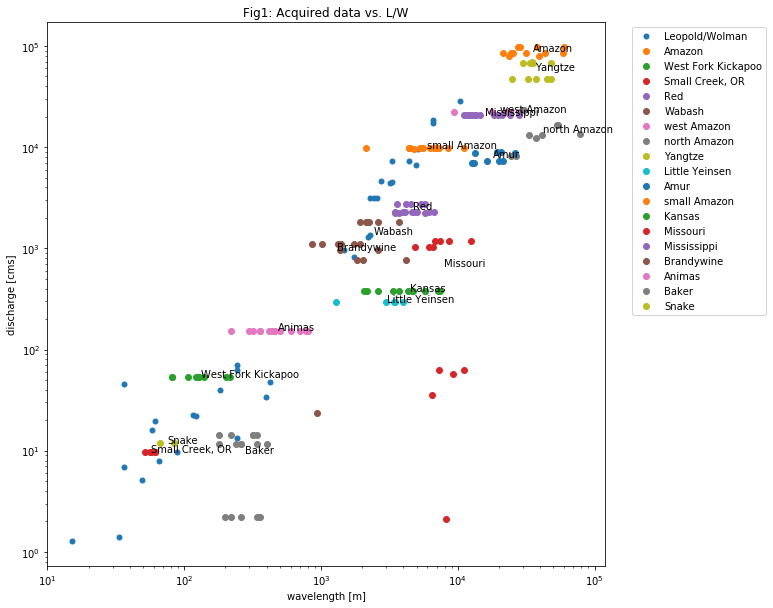

In [5]:
plt.figure(figsize = (10,10))
leg = ['Leopold/Wolman','Amazon', 'West Fork Kickapoo','Small Creek, OR', 'Red', 'Wabash', 'west Amazon', 'north Amazon', 'Yangtze', 'Little Yeinsen', 'Amur', 'small Amazon', 'Kansas', 'Missouri', 'Mississippi', 'Brandywine', 'Animas', 'Baker', 'Snake']

plt.plot(leopold_wave, leopold_dis, '.', markersize = 10)

for i in range(len(seg_data_wave)):
    plt.plot(seg_data_wave[i], seg_data_dis[i], '.', markersize = 12)
    plt.text(np.mean(seg_data_wave[i]), np.mean(seg_data_dis[i]), s = leg[1 + i])
plt.legend(leg,bbox_to_anchor=(1.04,1))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('wavelength [m]')
plt.ylabel('discharge [cms]')
plt.title('Fig1: Acquired data vs. L/W')


### Fig2: Averaged data vs. L/W 
1. Average all wavelength and discharge values for each segment
2. Re-plot according to Fig1 

Text(0.5, 1.0, 'Fig2: Averaged data vs. L/W ')

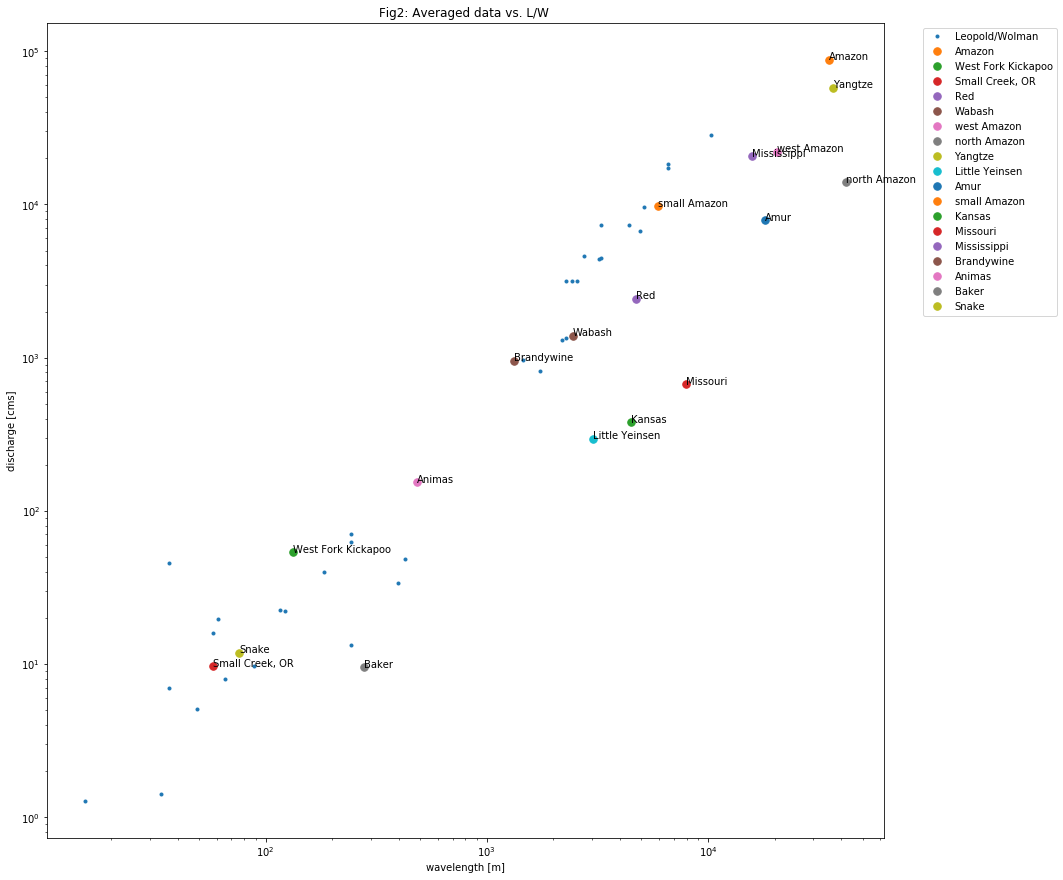

In [6]:
fig = plt.figure(figsize = (15, 15))
fig.patch.set_facecolor('white')
plt.plot(leopold_wave, leopold_dis, '.')
average_w = []
average_d = []
for i in range(len(seg_data_wave)):
    avg_w = np.mean(np.asarray(seg_data_wave[i]))
    avg_d = np.mean(np.asarray(seg_data_dis[i]))
    plt.plot(avg_w, avg_d, '.', markersize = 15)
    plt.text(avg_w, avg_d, s = leg[1 + i])
    average_w.append(avg_w)
    average_d.append(avg_d)
plt.legend(leg,bbox_to_anchor=(1.04,1))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('wavelength [m]')
plt.ylabel('discharge [cms]')
plt.title('Fig2: Averaged data vs. L/W ')

In [7]:
#Delete all nan-values from leopold/wolman dataset (delete corresponding values on list)
del_ind = []
leopold_wave = np.asarray(leopold_wave)
leopold_dis = np.asarray(leopold_dis)
for i in range(len(leopold_wave)):
    if np.isnan(leopold_wave[i]) or np.isnan(leopold_dis[i]):
        del_ind.append(i)
leopold_wave = np.delete(leopold_wave, del_ind)
leopold_dis = np.delete(leopold_dis, del_ind)

### Linear Regression of Fig. 2
1. Take natural log of both datasets used to generate Fig 2. 
2. Compute linear regression for L/W data points
3. Compute linear regression for acquired data points
4. Plot together, also print equation for both 

our points
_______________
R^2 = 0.8797732638069281
P = 9.071477018767685e-09
Standard Error = 0.11908280885553281
 
slope = 1.2885281546676364
intercept = -3.2804999187250514
 
Leopold/Wolman
_______________
R^2 = 0.9441794243080932
P = 1.2776217046445632e-21
Standard Error = 0.06575225222255994
 
slope = 1.5297333430391273
intercept = -4.126201091756643
 


Text(0, 0.5, 'ln(discharge [cms])')

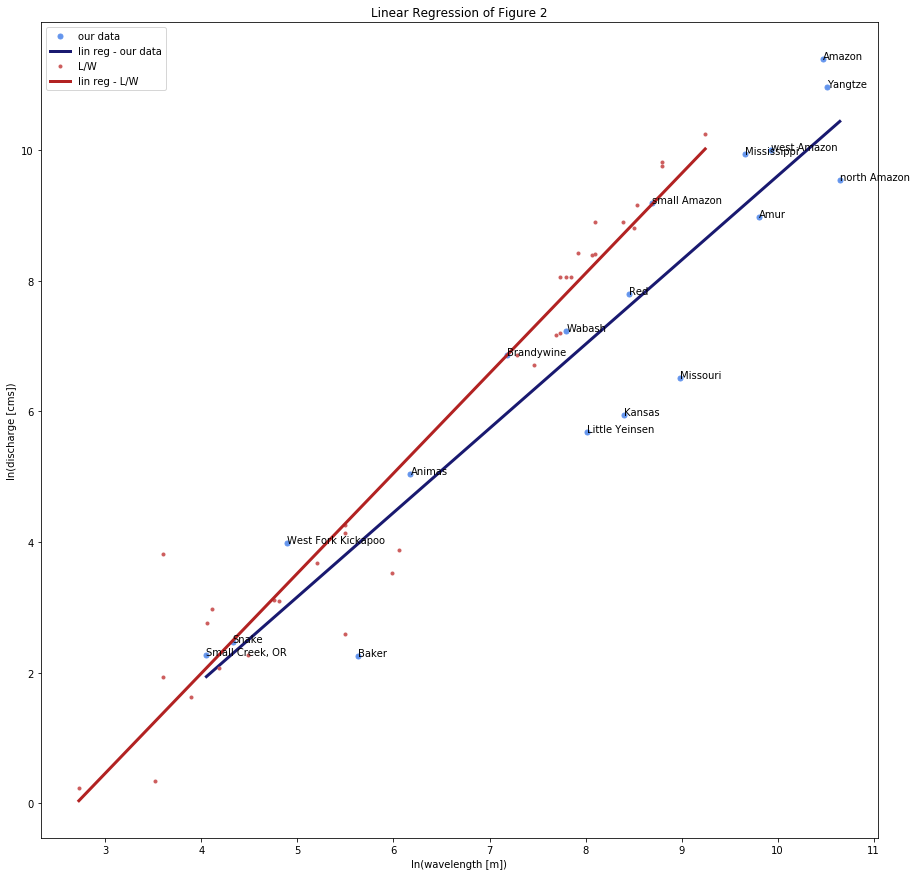

In [12]:
x_ln = np.log(average_w)
y_ln = np.log(average_d)
_,_, _, y_theo = dm.lin_reg(x_ln, y_ln, 'our points')

y_theo = np.sort(y_theo)

plt.figure(figsize = (15, 15))
plt.plot(x_ln, y_ln, '.', markersize = 10, color = 'cornflowerblue')
x_ln_sort = np.sort(x_ln)
plt.plot(x_ln_sort, y_theo, '-',color = 'midnightblue', linewidth = 3)

for i in range(len(x_ln)):
    plt.text(x_ln[i], y_ln[i], s = leg[1 + i])
    
leo_w_ln = np.log(leopold_wave)
leo_d_ln = np.log(leopold_dis)
_, _, _, leo_d_theo = dm.lin_reg(leo_w_ln, leo_d_ln, 'Leopold/Wolman')
plt.plot(leo_w_ln, leo_d_ln, '.', color = 'indianred')
leo_d_theo = np.sort(leo_d_theo)
leo_w_ln = np.sort(leo_w_ln)
plt.plot(leo_w_ln, leo_d_theo, '-', color = 'firebrick', linewidth = 3)

plt.legend(['our data', 'lin reg - our data', 'L/W', 'lin reg - L/W'])
plt.title('Linear Regression of Figure 2')
plt.xlabel('ln(wavelength [m])')
plt.ylabel('ln(discharge [cms])')